In [ ]:
# authorize google account to use bigquery
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# authorize drive to pull model
from google.colab import drive
drive.mount('/content/drive')

# pull data for repo from bigquery
project_id = 'uic-capstone-int'
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

In [6]:
import pandas as pd
from tensorflow import keras 

7 Key repos
* arrow
* airflow
* databricks
* mongodb/mongo (108110)
* cwida/duckdb (138754790)
* apache/kafka (2211243)
* apache/beam (50904245)

In [173]:
id=50904245

In [174]:
#Unique repo id's generated since 2011 (these id's are collected from bigquery to be used in a training loop that we'll be building around the pipeline)
unique_repo_id = pd.read_csv('drive/My Drive/unique_repoid/bq-results-20200929-031543-adwz8kt104m3.csv')

In [ ]:
# model_withTransfer = keras.models.load_model('drive/Shared drives/IDS 560 - Fall 20/model101.h5')

# Data Extraction Using BigQuery

In [175]:
# This cell is for data fetching process

#-----------------------Pushes---------------------------------------------------

sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, repo_name, count (*) number_of_pushes
FROM
(

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2015
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2016
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2017
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2018
WHERE type='PushEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2019
WHERE type='PushEvent' AND repo.id = {0}
)
GROUP BY 1,2,3
ORDER BY 1;'''.format(id)
dfPushes=client.query(sql).to_dataframe()




#---------------------------------Forks------------------------------------------

sql='''
    
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, repo_name, count (*) number_of_forks
FROM
(

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2015
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2016
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2017
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2018
WHERE type='ForkEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2019
WHERE type='ForkEvent' AND repo.id = {0}
)
GROUP BY 1,2,3
ORDER BY 1;
'''.format(id)
dfForks=client.query(sql).to_dataframe()




#-----------------------------------------Pulls------------------------------------
sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, repo_name, count (*) number_of_pulls
FROM
(

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2015
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2016
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2017
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2018
WHERE type='PullRequestEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2019
WHERE type='PullRequestEvent' AND repo.id = {0}
)
GROUP BY 1,2,3
ORDER BY 1;'''.format(id)
dfPulls=client.query(sql).to_dataframe()



#---------------------------------------Bookmarks-------------------------------------
sql= '''

SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, repo_name, count (DISTINCT actorID) number_of_Bookmarks
FROM
(
SELECT created_at as date, repo.id as repoID, actor.id AS actorID, repo.name as repo_name
FROM githubarchive.year.2015
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID, repo.name as repo_name
FROM githubarchive.year.2016
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID, repo.name as repo_name
FROM githubarchive.year.2017
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID, repo.name as repo_name
FROM githubarchive.year.2018
WHERE type='WatchEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, actor.id AS actorID, repo.name as repo_name
FROM githubarchive.year.2019
WHERE type='WatchEvent' AND repo.id = {0}
)
GROUP BY 1,2,3
ORDER BY 1;'''.format(id)
dfBoomarks = client.query(sql).to_dataframe()






#----------------------------Issues---------------------------------------------
sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, repo_name, count (*) number_of_issues
FROM
(

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2015
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2016
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2017
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2018
WHERE type='IssueEvent' AND repo.id = {0}

UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name
FROM githubarchive.year.2019
WHERE type='IssueEvent' AND repo.id = {0}
)
GROUP BY 1,2,3
ORDER BY 1;'''.format(id)
dfIssues=client.query(sql).to_dataframe()






#-------------------------Issuecomments-------------------------------------------

sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, repo_name, COUNT(*) AS issue_comment_count, COUNT( DISTINCT a_id) as issue_author_count
FROM 
(SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2015
WHERE type = 'IssueCommentEvent' AND repo.id = {0}


UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2016
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

UNION ALL



SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2017
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2018
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2019
WHERE type = 'IssueCommentEvent' AND repo.id = {0}

)
GROUP BY 1,2,3
ORDER BY 1;'''.format(id)
dfIssuecomment = client.query(sql).to_dataframe()



#---------------------------------------Commitcomments------------------------------------------
sql = '''
SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, repo_name, COUNT(*) AS commit_comment_count, COUNT( DISTINCT a_id) AS commit_author_count
FROM 
(SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2015
WHERE type = 'CommitCommentEvent' AND repo.id = {0}


UNION ALL

SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2016
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

UNION ALL



SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2017
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2018
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

UNION ALL


SELECT created_at as date, repo.id as repoID, repo.name as repo_name, actor.id AS a_id
FROM githubarchive.year.2019
WHERE type = 'CommitCommentEvent' AND repo.id = {0}

)
GROUP BY 1,2,3
ORDER BY 1;'''.format(id)

dfCommitcomment = client.query(sql).to_dataframe()

## Viewing the data

In [177]:
dfPushes

,year_month,repoID,repo_name,number_of_pushes
0,2016-02-26,50904245,apache/incubator-beam,1
1,2016-03-01,50904245,apache/incubator-beam,2
2,2016-03-02,50904245,apache/incubator-beam,1
3,2016-03-03,50904245,apache/incubator-beam,4
4,2016-03-04,50904245,apache/incubator-beam,5
...,...,...,...,...
1170,2020-01-09,50904245,apache/beam,15
1171,2020-01-10,50904245,apache/beam,21
1172,2020-01-11,50904245,apache/beam,3
1173,2020-01-13,50904245,apache/beam,16


In [178]:
dfForks

,year_month,repoID,repo_name,number_of_forks
0,2016-02-08,50904245,apache/incubator-beam,1
1,2016-02-16,50904245,apache/incubator-beam,1
2,2016-02-19,50904245,apache/incubator-beam,1
3,2016-02-24,50904245,apache/incubator-beam,1
4,2016-02-26,50904245,apache/incubator-beam,2
...,...,...,...,...
1056,2020-01-10,50904245,apache/beam,3
1057,2020-01-11,50904245,apache/beam,1
1058,2020-01-12,50904245,apache/beam,1
1059,2020-01-13,50904245,apache/beam,3


In [179]:
dfPulls

,year_month,repoID,repo_name,number_of_pulls
0,2016-02-26,50904245,apache/incubator-beam,2
1,2016-02-29,50904245,apache/incubator-beam,3
2,2016-03-01,50904245,apache/incubator-beam,5
3,2016-03-02,50904245,apache/incubator-beam,6
4,2016-03-03,50904245,apache/incubator-beam,10
...,...,...,...,...
1294,2020-01-09,50904245,apache/beam,21
1295,2020-01-10,50904245,apache/beam,24
1296,2020-01-11,50904245,apache/beam,8
1297,2020-01-13,50904245,apache/beam,31


In [180]:
dfBoomarks

,year_month,repoID,repo_name,number_of_Bookmarks
0,2016-02-04,50904245,apache/incubator-beam,1
1,2016-02-05,50904245,apache/incubator-beam,2
2,2016-02-07,50904245,apache/incubator-beam,2
3,2016-02-09,50904245,apache/incubator-beam,3
4,2016-02-10,50904245,apache/incubator-beam,1
...,...,...,...,...
1179,2020-01-10,50904245,apache/beam,2
1180,2020-01-11,50904245,apache/beam,2
1181,2020-01-12,50904245,apache/beam,1
1182,2020-01-13,50904245,apache/beam,3


In [181]:
dfIssuecomment

,year_month,repoID,repo_name,issue_comment_count,issue_author_count
0,2016-02-26,50904245,apache/incubator-beam,2,2
1,2016-02-27,50904245,apache/incubator-beam,2,2
2,2016-02-29,50904245,apache/incubator-beam,2,2
3,2016-03-01,50904245,apache/incubator-beam,8,5
4,2016-03-02,50904245,apache/incubator-beam,4,3
...,...,...,...,...,...
1337,2020-01-10,50904245,apache/beam,87,30
1338,2020-01-11,50904245,apache/beam,20,11
1339,2020-01-12,50904245,apache/beam,5,3
1340,2020-01-13,50904245,apache/beam,106,29


In [182]:
dfIssues

,year_month,repoID,repo_name,number_of_issues


In [183]:
dfCommitcomment

,year_month,repoID,repo_name,commit_comment_count,commit_author_count
0,2016-03-16,50904245,apache/incubator-beam,1,1
1,2016-03-17,50904245,apache/incubator-beam,2,2
2,2016-04-29,50904245,apache/incubator-beam,1,1
3,2016-05-02,50904245,apache/incubator-beam,1,1
4,2016-05-24,50904245,apache/incubator-beam,1,1
...,...,...,...,...,...
97,2019-11-09,50904245,apache/beam,1,1
98,2019-11-14,50904245,apache/beam,1,1
99,2019-12-03,50904245,apache/beam,1,1
100,2019-12-04,50904245,apache/beam,1,1


# Merges

In [184]:
merge1 = pd.merge(dfPushes,dfForks,how='outer', on='year_month')
merge2 = pd.merge(merge1, dfPulls, how='outer', on='year_month')
merge3 = pd.merge(merge2, dfBoomarks, how='outer', on='year_month')
merge4 = pd.merge(merge3, dfIssuecomment, how='outer', on='year_month')
merge5 = pd.merge(merge4,dfCommitcomment,how='outer',on='year_month')
merge6 = pd.merge(merge5, dfIssues, how='outer',on='year_month')
merge6.drop(['repoID_x','repoID_y', 'repoID'], axis=1, inplace=True)
merge6.drop(['repo_name_x','repo_name_y', 'repo_name'], axis=1, inplace=True)
#merge6.drop('repoID', axis=1, inplace=True)
merge6.sort_values(by='year_month',ascending=True,inplace=True)
merge6

,year_month,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues
1339,2016-02-04,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1340,2016-02-05,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1341,2016-02-07,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1179,2016-02-08,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,2016-02-09,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1175,2020-01-10,21.0,3.0,24.0,2.0,87.0,30.0,NaN,NaN,NaN
1176,2020-01-11,3.0,1.0,8.0,2.0,20.0,11.0,NaN,NaN,NaN
1285,2020-01-12,NaN,1.0,NaN,1.0,5.0,3.0,NaN,NaN,NaN
1177,2020-01-13,16.0,3.0,31.0,3.0,106.0,29.0,NaN,NaN,NaN


In [185]:
merge6['year_month']=pd.to_datetime(merge6['year_month'])
merge6.rename({'year_month': 'datetime'}, axis=1, inplace=True)
merge6.index=merge6['datetime']
merge6.drop('datetime',axis=1,inplace=True)
merge6

,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues
datetime,,,,,,,,,
2016-02-04,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2016-02-05,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2016-02-07,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2016-02-08,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-09,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-01-10,21.0,3.0,24.0,2.0,87.0,30.0,NaN,NaN,NaN
2020-01-11,3.0,1.0,8.0,2.0,20.0,11.0,NaN,NaN,NaN
2020-01-12,NaN,1.0,NaN,1.0,5.0,3.0,NaN,NaN,NaN


# Weekly aggregation

In [186]:
#aggregating the weekly data and creating weekly time steps
WeeklyTS = pd.DataFrame()
WeeklyTS = merge6.resample('W').sum()

In [187]:
WeeklyTS.reset_index(level=0, inplace=True)
WeeklyTS

,datetime,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues
0,2016-02-07,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,2016-02-14,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
2,2016-02-21,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
3,2016-02-28,1.0,9.0,2.0,15.0,4.0,4.0,0.0,0.0,0.0
4,2016-03-06,13.0,14.0,42.0,15.0,61.0,29.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
202,2019-12-22,58.0,17.0,134.0,30.0,491.0,155.0,0.0,0.0,0.0
203,2019-12-29,28.0,15.0,63.0,18.0,193.0,77.0,0.0,0.0,0.0
204,2020-01-05,22.0,8.0,66.0,20.0,194.0,70.0,0.0,0.0,0.0
205,2020-01-12,73.0,12.0,127.0,22.0,568.0,162.0,0.0,0.0,0.0


# Extration and merging of Commits Data with the help of Repo names

In [188]:
repo_name_list = dfPushes['repo_name'].unique().tolist()
repo_name_tuple = tuple(repo_name_list)

In [189]:
sql = '''

SELECT   commit, committer.email, DATE(TIMESTAMP_SECONDS(committer.date.seconds)) AS committed_date
FROM `bigquery-public-data.github_repos.commits`
WHERE EXISTS (
  SELECT 1 FROM UNNEST(repo_name) name 
  WHERE name IN {} AND EXTRACT(YEAR FROM DATE(TIMESTAMP_SECONDS(committer.date.seconds))) >2015
)
ORDER BY 3

'''.format(repo_name_tuple)

dfCommits = client.query(sql).to_dataframe()

In [190]:
dfCommits

,commit,email,committed_date
0,0718469560a583f2cbb2be69ab58233c9c6a7323,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...,2016-01-08
1,1b0d4173e6d8d933d3fc300ccefa70e1cf95e33f,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...,2016-01-08
2,1ed2bffbecd3d640698fe33615fe9cd293cd8a90,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...,2016-01-08
3,55cf870891b1ab080043008278139fa549f81796,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...,2016-01-08
4,f15d459d0757d63c2e3274a45d92e1bb8ffdef91,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...,2016-01-08
...,...,...,...
28020,77aec5269d4a104ab2efc945f327fc57d24b08bf,1505422b2465e9a84f6fdfaa161078890c593f06@githu...,2020-10-14
28021,a6da34a31e196bf944d9d4b4a13703f7eebf1c13,1505422b2465e9a84f6fdfaa161078890c593f06@githu...,2020-10-14
28022,9f4c8798ee52b959d7a50956e59517a925dced06,1505422b2465e9a84f6fdfaa161078890c593f06@githu...,2020-10-14
28023,6e7b1c44bc7275ee047afc059fd610cd3f4e5bee,1505422b2465e9a84f6fdfaa161078890c593f06@githu...,2020-10-15


In [191]:
dfCommits['committed_date']=pd.to_datetime(dfCommits['committed_date'])
dfCommits.index=dfCommits['committed_date']
dfCommits.drop('committed_date',axis=1,inplace=True)
dfCommits

,commit,email
committed_date,,
2016-01-08,0718469560a583f2cbb2be69ab58233c9c6a7323,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...
2016-01-08,1b0d4173e6d8d933d3fc300ccefa70e1cf95e33f,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...
2016-01-08,1ed2bffbecd3d640698fe33615fe9cd293cd8a90,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...
2016-01-08,55cf870891b1ab080043008278139fa549f81796,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...
2016-01-08,f15d459d0757d63c2e3274a45d92e1bb8ffdef91,a1559536771c19c1fd82195b5338c890b9c1c3e7@googl...
...,...,...
2020-10-14,77aec5269d4a104ab2efc945f327fc57d24b08bf,1505422b2465e9a84f6fdfaa161078890c593f06@githu...
2020-10-14,a6da34a31e196bf944d9d4b4a13703f7eebf1c13,1505422b2465e9a84f6fdfaa161078890c593f06@githu...
2020-10-14,9f4c8798ee52b959d7a50956e59517a925dced06,1505422b2465e9a84f6fdfaa161078890c593f06@githu...


In [192]:
Weekly_commit_TS = pd.DataFrame()
Weekly_commit_TS = dfCommits.resample('W').agg({'commit': 'count', 'email': 'nunique'})

In [193]:
Weekly_commit_TS.rename(columns={"commit":"commit_count","email":"unique_committer_count"}, inplace=True)
Weekly_commit_TS.reset_index(level=0, inplace=True)
Weekly_commit_TS.rename(columns={'committed_date':'datetime'}, inplace=True)
Weekly_commit_TS

,datetime,commit_count,unique_committer_count
0,2016-01-10,43,1
1,2016-01-17,26,2
2,2016-01-24,7,2
3,2016-01-31,5,4
4,2016-02-07,54,2
...,...,...,...
245,2020-09-20,83,17
246,2020-09-27,107,14
247,2020-10-04,85,18
248,2020-10-11,90,15


In [194]:
WeeklyTS = pd.merge(WeeklyTS,Weekly_commit_TS,how='outer', on='datetime')

In [195]:
WeeklyTS.head(10)

,datetime,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,commit_count,unique_committer_count
0,2016-02-07,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,54,2
1,2016-02-14,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3,3
2,2016-02-21,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2016-02-28,1.0,9.0,2.0,15.0,4.0,4.0,0.0,0.0,0.0,185,5
4,2016-03-06,13.0,14.0,42.0,15.0,61.0,29.0,0.0,0.0,0.0,184,8
5,2016-03-13,17.0,7.0,29.0,14.0,56.0,29.0,0.0,0.0,0.0,173,9
6,2016-03-20,21.0,12.0,40.0,20.0,55.0,35.0,3.0,3.0,0.0,56,11
7,2016-03-27,16.0,5.0,33.0,10.0,57.0,28.0,0.0,0.0,0.0,59,11
8,2016-04-03,21.0,5.0,57.0,19.0,139.0,42.0,0.0,0.0,0.0,55,10
9,2016-04-10,38.0,6.0,86.0,12.0,174.0,54.0,0.0,0.0,0.0,101,12


# Ploting distribution

In [196]:
#Summing all the data to get an idea of the frequency of different events
col_sum=WeeklyTS.drop('datetime',axis=1).sum(axis=0)
col_sum.sort_values(ascending=False, inplace=True)

In [197]:
col_sum

issue_comment_count       60423.0
commit_count              28025.0
number_of_pulls           19835.0
issue_author_count        18406.0
number_of_pushes           9011.0
unique_committer_count     4970.0
number_of_Bookmarks        3705.0
number_of_forks            2560.0
commit_comment_count        175.0
commit_author_count         128.0
number_of_issues              0.0
dtype: float64

In [198]:
import matplotlib.pyplot as plt

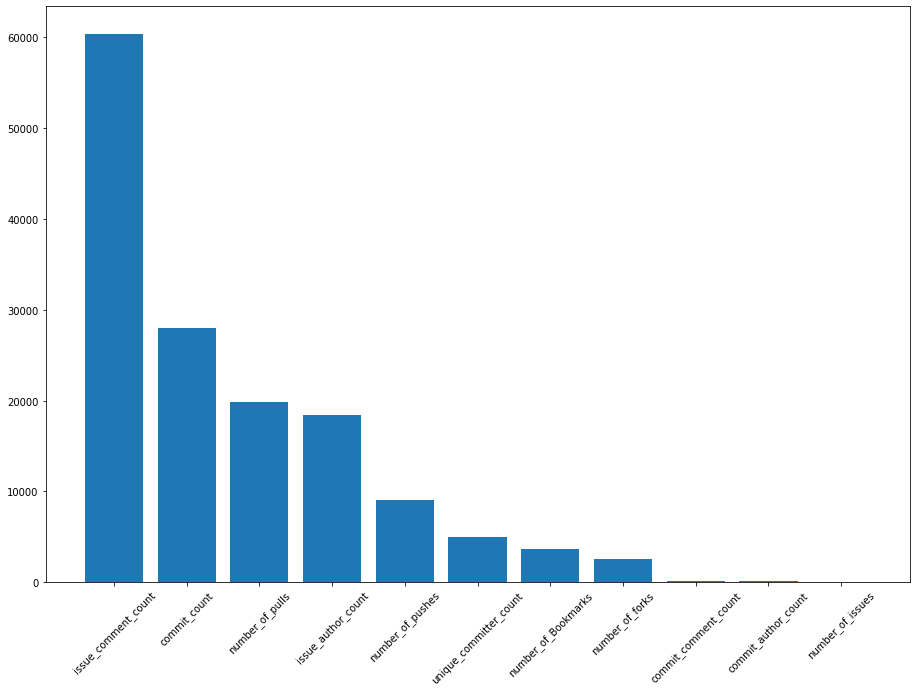

In [199]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_axes([0,0,2,2])
ax.bar(col_sum.index,col_sum)
plt.xticks(rotation=45)
plt.show()

# Summing counts and status labeling

In [200]:
WeeklyTS['Total_count'] = WeeklyTS.drop('datetime',axis=1).sum(axis=1)

In [201]:
WeeklyTS.head(10)

,datetime,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,commit_count,unique_committer_count,Total_count
0,2016-02-07,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,54,2,61.0
1,2016-02-14,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3,3,14.0
2,2016-02-21,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0,0,10.0
3,2016-02-28,1.0,9.0,2.0,15.0,4.0,4.0,0.0,0.0,0.0,185,5,225.0
4,2016-03-06,13.0,14.0,42.0,15.0,61.0,29.0,0.0,0.0,0.0,184,8,366.0
5,2016-03-13,17.0,7.0,29.0,14.0,56.0,29.0,0.0,0.0,0.0,173,9,334.0
6,2016-03-20,21.0,12.0,40.0,20.0,55.0,35.0,3.0,3.0,0.0,56,11,256.0
7,2016-03-27,16.0,5.0,33.0,10.0,57.0,28.0,0.0,0.0,0.0,59,11,219.0
8,2016-04-03,21.0,5.0,57.0,19.0,139.0,42.0,0.0,0.0,0.0,55,10,348.0
9,2016-04-10,38.0,6.0,86.0,12.0,174.0,54.0,0.0,0.0,0.0,101,12,483.0


In [202]:
# Setting Threshold in terms of percentage of drop
Threshold = 0.1
for i in range(5,len(WeeklyTS)):
   Avg = WeeklyTS['Total_count'].iloc[i-5:i,].mean()
   diff = WeeklyTS['Total_count'].iloc[i] - WeeklyTS['Total_count'].iloc[i-1]
   if diff>=0:
     WeeklyTS.loc[i,'Status'] = 1
   else:
     if abs(diff)/Avg < Threshold:
       WeeklyTS.loc[i,'Status'] = 1
     else:
       WeeklyTS.loc[i,'Status'] = 0

In [203]:
WeeklyTS.head(10)

,datetime,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,commit_count,unique_committer_count,Total_count,Status
0,2016-02-07,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,54,2,61.0,NaN
1,2016-02-14,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3,3,14.0,NaN
2,2016-02-21,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0,0,10.0,NaN
3,2016-02-28,1.0,9.0,2.0,15.0,4.0,4.0,0.0,0.0,0.0,185,5,225.0,NaN
4,2016-03-06,13.0,14.0,42.0,15.0,61.0,29.0,0.0,0.0,0.0,184,8,366.0,NaN
5,2016-03-13,17.0,7.0,29.0,14.0,56.0,29.0,0.0,0.0,0.0,173,9,334.0,0.0
6,2016-03-20,21.0,12.0,40.0,20.0,55.0,35.0,3.0,3.0,0.0,56,11,256.0,0.0
7,2016-03-27,16.0,5.0,33.0,10.0,57.0,28.0,0.0,0.0,0.0,59,11,219.0,0.0
8,2016-04-03,21.0,5.0,57.0,19.0,139.0,42.0,0.0,0.0,0.0,55,10,348.0,1.0
9,2016-04-10,38.0,6.0,86.0,12.0,174.0,54.0,0.0,0.0,0.0,101,12,483.0,1.0


In [204]:
WeeklyTS.index = WeeklyTS['datetime']
WeeklyTS.drop('datetime', axis=1, inplace=True)
WeeklyTS.insert(0, 'year', WeeklyTS.index.year)
WeeklyTS.insert(1, 'month', WeeklyTS.index.month)
WeeklyTS.insert(2, 'day', WeeklyTS.index.day)
WeeklyTS.reset_index(level=0, inplace=True)
WeeklyTS.head(10)

,datetime,year,month,day,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,commit_count,unique_committer_count,Total_count,Status
0,2016-02-07,2016,2,7,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,54,2,61.0,NaN
1,2016-02-14,2016,2,14,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3,3,14.0,NaN
2,2016-02-21,2016,2,21,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0,0,10.0,NaN
3,2016-02-28,2016,2,28,1.0,9.0,2.0,15.0,4.0,4.0,0.0,0.0,0.0,185,5,225.0,NaN
4,2016-03-06,2016,3,6,13.0,14.0,42.0,15.0,61.0,29.0,0.0,0.0,0.0,184,8,366.0,NaN
5,2016-03-13,2016,3,13,17.0,7.0,29.0,14.0,56.0,29.0,0.0,0.0,0.0,173,9,334.0,0.0
6,2016-03-20,2016,3,20,21.0,12.0,40.0,20.0,55.0,35.0,3.0,3.0,0.0,56,11,256.0,0.0
7,2016-03-27,2016,3,27,16.0,5.0,33.0,10.0,57.0,28.0,0.0,0.0,0.0,59,11,219.0,0.0
8,2016-04-03,2016,4,3,21.0,5.0,57.0,19.0,139.0,42.0,0.0,0.0,0.0,55,10,348.0,1.0
9,2016-04-10,2016,4,10,38.0,6.0,86.0,12.0,174.0,54.0,0.0,0.0,0.0,101,12,483.0,1.0


# Modeling

In [205]:

# This step is for padding the dataframe to maintain the consistency of all the time series we'll be fetching in the future
# This step also deals with the problem of missing dates(if no event happens at all) in the time series
# from datetime import datetime
# now=datetime.now()
# today = now.strftime("%Y-%m-%d")
# today

# idx = pd.date_range('2016-01-01', today)
# merge6.index = pd.DatetimeIndex(merge6.index)

# merge6 = merge6.reindex(idx, fill_value=0)

In [ ]:
#dimensionality reduction just for the visualization

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(WeeklyTS)
pca_2d = pca.transform(WeeklyTS)

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])

In [ ]:
#clustering just to see any patterns and to create a dummy target variable

from sklearn.cluster import KMeans
Kmeansmodel = KMeans(n_clusters=2)
Kmeansmodel.fit(pca_2d)
y_kmeans = Kmeansmodel.predict(pca_2d)

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = Kmeansmodel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#Just adding a dummy target variable for testing
WeeklyTS['status']=Kmeansmodel.labels_
WeeklyTS['status'].value_counts()

In [ ]:
#-------------Pending tasks-------------------------
#Test for seasonality and Trends in the TS
#Dicky fuller test for stationarity




In [ ]:
#seperating date feature into 'year','month', and 'day' features
WeeklyTS.insert(0, 'year', WeeklyTS.index.year)
WeeklyTS.insert(1, 'month', WeeklyTS.index.month)
WeeklyTS.insert(2, 'day', WeeklyTS.index.day)
WeeklyTS.reset_index(level=0, inplace=True)

In [ ]:
WeeklyTS.drop('index', axis=1, inplace=True)
WeeklyTS

In [ ]:
# yet to be performed - Normalization of the above dataset





In [ ]:
# multivariate data preparation

from numpy import array
from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# end of the pattern
		end_ix = i + n_steps
		# check if surpaas the dataset
		if end_ix > len(sequences):
			break
		# input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

# define input sequence
t=[]

# transforming each column to an array
for i in range(0,len(WeeklyTS.columns)):
  t.append(WeeklyTS.iloc[:,i].to_numpy())

# convert array to [rows, columns] structure
for i in range(0,len(WeeklyTS.columns)):
  t[i]=t[i].reshape((len(t[i]),1))



# horizontally stack columns
dataset=t[0]
for i in range(1,len(WeeklyTS.columns)):
  dataset = hstack((dataset,t[i]))

# Window Size
n_steps = 5

# convert into input/output
X, y = split_sequences(dataset, n_steps)
n_features = X.shape[2]
print(X.shape, y.shape)

# output
for i in range(len(X)):
	print(X[i], y[i])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
#Vanilla model
def build_LSTM(n_steps, hidden_units):
      model = Sequential()
      model.add(LSTM(hidden_units, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
      model.add(LSTM(hidden_units, activation='relu'))
      model.add(Dense(n_features))
      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
      return model

In [ ]:

# model_withTransfer = build_LSTM(5, 20)
# model_withTransfer.save('drive/Shared drives/IDS 560 - Fall 20/model101.h5')
# history=model.fit(X, y, epochs=400, verbose=0)

# # accuracy plot
# fig = plt.figure()
# fig.patch.set_facecolor('white')
# plt.plot(history.history['accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train accuracy'], loc='upper right')
# plt.show()
# model_withTransfer.save("model101")

In [ ]:
#  loss plot
# fig = plt.figure()
# fig.patch.set_facecolor('white')
# plt.plot(history.history['loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train loss'], loc='upper right')
# plt.show()

In [ ]:
# saving model weights for the weights initialization in the next cycle 
# model.save_weights('weights.h5',)

In [ ]:
def FitForecast(X_train, y_train, n_steps,
                hidden_units, 
                epochs, trained_model):
    
    '''
    Fits a model and returns the model and history
    Args:
        X_train: input dataset for training
        y_train: output dataset for training
        n_steps: window size
        hidden_units: int/list specifying the number 
                      of hidden units
        epochs: int that defines the number of 
                training phases through the
                training dataset
        trained_model: already trained keras sequential 
                       model
        
    Returns:
        model: keras sequential model
        history: training loss history and training accuracy history
        
    '''
    model = build_LSTM(n_steps,hidden_units)
    model.summary()
    #initializing with the previous model weights
    model.set_weights(weights = trained_model.get_weights())        
    
    history = model.fit(x=X_train, y=y_train, 
                epochs=epochs, verbose=0,
                shuffle=False)

    return model, history

In [ ]:
model_withTransfer, hist = FitForecast(X, y, 5, 20, 600, trained_model=model_withTransfer)

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper right')
plt.show()

In [ ]:
# accuracy plot
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy'], loc='upper right')
plt.show()

In [ ]:
# Saving model to be picked up in the next cycle for transfer learning
keras.models.save_model(model_withTransfer,'drive/Shared drives/IDS 560 - Fall 20/model101.h5')